### TF-IDF
In this example we illustrate the how a <b>tfid</b> is constructed for a given sentence / document.

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from textblob import TextBlob
import math

Define the term frequency

In [89]:
def tf(word, blob):
       return blob.words.count(word) / len(blob.words)

Define the number of words in a bloblist

In [90]:
def n_containing(word, bloblist):
    return 1 + sum(1 for blob in bloblist if word in blob)

Calculate the inverse document frequency

In [91]:
def idf(word, bloblist):
    x = n_containing(word, bloblist)
    return math.log(len(bloblist) / (x if x else 1))

Calculate the tfidf

In [92]:
def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)

In [93]:
text = 'tf idf, short form of term frequency, inverse document frequency'
text2 = 'is a numerical statistic that is intended to reflect how important'
text3 = 'a word is to a document in a collection or corpus'

blob = TextBlob(text)
blob2 = TextBlob(text2)
blob3 = TextBlob(text3)
bloblist = [blob, blob2, blob3]
tf_score = tf('short', blob)
idf_score = idf('short', bloblist)
tfidf_score = tfidf('short', blob, bloblist)
print("tf score for word short--- "+ str(tf_score)+"\n")
print("idf score for word short--- "+ str(idf_score)+"\n")
print("tf x idf score of word short--- "+str(tfidf_score))

tf score for word short--- 0.1

idf score for word short--- 0.4054651081081644

tf x idf score of word short--- 0.04054651081081644


### SKLearn also has its TFIDF:


In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [95]:
corpus = [s.raw for s in bloblist]

In [96]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [97]:
print(vectorizer.get_feature_names())

['collection', 'corpus', 'document', 'form', 'frequency', 'how', 'idf', 'important', 'in', 'intended', 'inverse', 'is', 'numerical', 'of', 'or', 'reflect', 'short', 'statistic', 'term', 'tf', 'that', 'to', 'word']


The shape of the vector X allows you to trace back the number of lines in the text and the number of words which are to be vectorized

In [98]:
print(X.shape)

(3, 23)


In [99]:
import pandas as pd

In [101]:
df = pd.DataFrame(X.todense())
c = np.array(vectorizer.get_feature_names())
df.columns = c

In [102]:
df

,collection,corpus,document,form,frequency,how,idf,important,in,intended,...,of,or,reflect,short,statistic,term,tf,that,to,word
0,0.000000,0.000000,0.223506,0.293884,0.587768,0.000000,0.293884,0.000000,0.000000,0.000000,...,0.293884,0.000000,0.000000,0.293884,0.000000,0.293884,0.293884,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.317949,0.000000,0.317949,0.000000,0.317949,...,0.000000,0.000000,0.317949,0.000000,0.317949,0.000000,0.000000,0.317949,0.241809,0.000000
2,0.385323,0.385323,0.293048,0.000000,0.000000,0.000000,0.000000,0.000000,0.385323,0.000000,...,0.000000,0.385323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.293048,0.385323


### Dimension Reduction using PCA

In [105]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X.todense())

In [112]:
data2D = pca.transform(X.todense())

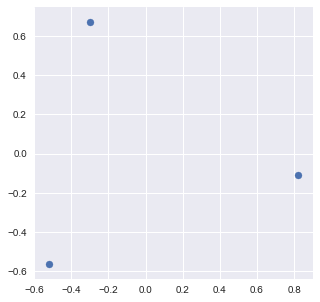

In [120]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
plt.scatter(data2D[:,0],data2D[:,1])